<a href="https://colab.research.google.com/github/Manisha-263/Classes-Practice-Questions/blob/main/Manisha_Bibi_%2C_FA24_BBD_045(A).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 1: Handling Missing Values**

In [3]:
import pandas as pd
import numpy as np


## **Assigning DataFrame to DF**

In [2]:
# Load the dataset (replace 'melb_data.csv' with the actual file path)
df = pd.read_csv('melb_data.csv')

In [5]:
# Step 1: Identify and drop columns with more than 20% missing values
print("\nHandling Missing Values...")
missing_percent = (df.isna().sum() / len(df)) * 100
columns_to_drop = missing_percent[missing_percent > 20].index
df.drop(columns=columns_to_drop, inplace=True)
print("Dropped columns with more than 20% missing values:", columns_to_drop)



Handling Missing Values...
Dropped columns with more than 20% missing values: Index([], dtype='object')


In [8]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Calculate medians for only numeric columns
median_values = df[numeric_cols].median()

# Fill NaN values using the calculated medians
df.fillna(median_values, inplace=True)

print("Filled missing numerical values with median.")

Filled missing numerical values with median.


In [9]:
# Step 3: Fill missing categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
print("Filled categorical missing values with mode.")


Filled categorical missing values with mode.


<ipython-input-9-10ab2e8ba360>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


## **Task 2: Advanced Filtering and Indexing**

In [11]:
# Step 1: Retrieve properties in Richmond with price > 1,000,000
richmond_houses = df[(df["Suburb"] == "Richmond") & (df["Price"] > 1000000)]
print("Properties in Richmond with price > $1M:")
print(richmond_houses.head())

Properties in Richmond with price > $1M:
        Suburb          Address  Rooms Type      Price Method        SellerG  \
5257  Richmond       81 Erin St      3    h  1260000.0      S         Biggin   
5258  Richmond  52 Lyndhurst St      3    t  1236000.0      S         Jellis   
5263  Richmond        7 Bank St      3    h  1600000.0      S  hockingstuart   
5264  Richmond      29 Bowen St      3    h  2180000.0     PI           Blue   
5266  Richmond      131 Lord St      4    h  3335000.0      S         Jellis   

           Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
5257  3/09/2016       2.6    3121.0       2.0       1.0  0.0     203.0   
5258  3/09/2016       2.6    3121.0       3.0       2.0  1.0     675.0   
5263  3/12/2016       2.6    3121.0       3.0       2.0  1.0     115.0   
5264  3/12/2016       2.6    3121.0       3.0       2.0  2.0     345.0   
5266  3/12/2016       2.6    3121.0       4.0       2.0  2.0     319.0   

     CouncilArea  Lattitude  Long

In [37]:
# Step 2: Extract specific columns where land size is above 500 sqm
df_filtered = df.loc[df["Landsize"] > 500, ["Price", "Suburb"]]
print("Extracted properties with land size > 500 sqm:")
print(df_filtered.head())

Extracted properties with land size > 500 sqm:
        Price        Suburb
20  1330000.0    Abbotsford
22  1090000.0    Abbotsford
45   720000.0  Airport West
46   785000.0  Airport West
47   725000.0  Airport West


In [38]:
# Step 3: Find top 5 most expensive houses
df_sorted = df.sort_values(by="Price", ascending=False)
print("Top 5 most expensive houses:")
df_sorted.head(5)

Top 5 most expensive houses:


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price_per_Room,Year_Sold,Category
12094,Mulgrave,35 Bevis St,3,h,9000000.0,PI,Hall,2017-07-29,18.8,3170.0,...,1.0,744.0,Monash,-37.93168,145.16126,South-Eastern Metropolitan,7113.0,3.000000e+06,2017,Expensive
7692,Canterbury,49 Mangarra Rd,5,h,8000000.0,VB,Sotheby's,2017-05-13,9.0,3126.0,...,4.0,2079.0,Boroondara,-37.81790,145.06940,Southern Metropolitan,3265.0,1.600000e+06,2017,Expensive
9575,Hawthorn,49 Lisson Gr,4,h,7650000.0,S,Abercromby's,2017-06-17,5.3,3122.0,...,4.0,1690.0,Boroondara,-37.82652,145.03052,Southern Metropolitan,11308.0,1.912500e+06,2017,Expensive
3616,Kew,15 Barry St,6,h,6500000.0,S,Jellis,2016-08-13,5.6,3101.0,...,3.0,1334.0,Boroondara,-37.80290,145.02670,Southern Metropolitan,10331.0,1.083333e+06,2016,Expensive
12557,Middle Park,136 Page St,5,h,6400000.0,S,Marshall,2017-09-09,3.0,3206.0,...,1.0,553.0,Moreland,-37.84908,144.95753,Southern Metropolitan,2019.0,1.280000e+06,2017,Expensive


## **Task 3: Data Transformation & Feature Engineering**

In [34]:
# Step 1: Create new column for price per room
df["Price_per_Room"] = df["Price"] / df["Rooms"]
print("Created 'Price_per_Room' column:")
print(df[["Price", "Rooms", "Price_per_Room"]].head())

Created 'Price_per_Room' column:
       Price  Rooms  Price_per_Room
0  1480000.0      2   740000.000000
1  1035000.0      2   517500.000000
2  1465000.0      3   488333.333333
3   850000.0      3   283333.333333
4  1600000.0      4   400000.000000


In [35]:
# Step 2: Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
print("Converted 'Date' column to datetime format.")

Converted 'Date' column to datetime format.


In [36]:
# Step 3: Extract year of sale
df["Year_Sold"] = df["Date"].dt.year
print("Extracted 'Year_Sold' from 'Date':")
print(df[["Date", "Year_Sold"]].head())

Extracted 'Year_Sold' from 'Date':
        Date  Year_Sold
0 2016-12-03       2016
1 2016-02-04       2016
2 2017-03-04       2017
3 2017-03-04       2017
4 2016-06-04       2016


## **Task 4: Aggregation and Grouping**

In [33]:
# Step 1: Find the average price of properties in each suburb
suburb_avg_price = df.groupby("Suburb")["Price"].mean()
print(suburb_avg_price)

Suburb
Abbotsford      1.060366e+06
Aberfeldie      1.277455e+06
Airport West    7.566567e+05
Albanvale       5.370833e+05
Albert Park     1.941355e+06
                    ...     
Wonga Park      9.000000e+05
Wyndham Vale    4.832500e+05
Yallambie       8.396875e+05
Yarra Glen      6.200000e+05
Yarraville      9.886155e+05
Name: Price, Length: 314, dtype: float64


In [32]:
# Step 2: Count number of properties sold per suburb
properties_per_suburb = df.groupby("Suburb")["Price"].count()
print("Total number of properties sold per suburb:")
print(properties_per_suburb.head())

Total number of properties sold per suburb:
Suburb
Abbotsford      56
Aberfeldie      44
Airport West    67
Albanvale        6
Albert Park     69
Name: Price, dtype: int64


In [30]:
# Step 3: Identify the suburb with the highest average price
most_expensive_suburb = suburb_avg_price.idxmax()
print("Most expensive suburb:", most_expensive_suburb)

Most expensive suburb: Kooyong


## **Task 5: Exporting & Reporting Data**

In [29]:
# Save cleaned dataset to CSV
df.to_csv('cleaned_melb_data.csv', index=False)
print("Saved cleaned data as 'cleaned_melb_data.csv'.")

Saved cleaned data as 'cleaned_melb_data.csv'.


Text(0.5, 0, 'Suburb')

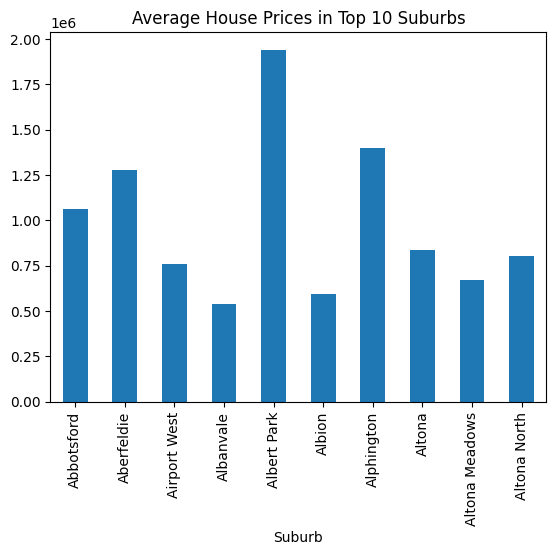

In [31]:
# Plot average price of top 10 suburbs
suburb_avg_price.head(10).plot(kind="bar")
plt.title("Average House Prices in Top 10 Suburbs")
plt.xlabel("Suburb")

## **Bonus Challenge**

In [28]:
# Step 1: Classify houses as 'Expensive' or 'Affordable' based on median price
median_price = df["Price"].median()
df["Category"] = df["Price"].apply(lambda x: "Expensive" if x > median_price else "Affordable")
print("Classified properties as 'Expensive' or 'Affordable':")
print(df[["Price", "Category"]].head())

Classified properties as 'Expensive' or 'Affordable':
       Price    Category
0  1480000.0   Expensive
1  1035000.0   Expensive
2  1465000.0   Expensive
3   850000.0  Affordable
4  1600000.0   Expensive


In [27]:

# Step 2: Calculate correlation between price and number of rooms
correlation = df[['Price', 'Rooms']].corr()
print("Correlation between Price and Rooms:\n", correlation)

Correlation between Price and Rooms:
           Price     Rooms
Price  1.000000  0.496634
Rooms  0.496634  1.000000
